## BUSINESS PROBLEM 
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create


## BUSINESS SOLUTION  
By analyzing domestic profit, worldwide profit, and production profit ratios, the new movie studio can identify which films offer the best returns on investment. These insights help guide decisions on budgeting, genre selection, and marketing strategy, enabling the company to focus on producing movies that maximize profitability and audience appeal.


## Get started 


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


## Data Analysis  

### Objectives  
1: Load the three datasets 




In [17]:
df1 = pd.read_csv('Data\cleaned_movie_budgets.csv')
df1.head()


,release_date,title,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,335507625.0,2.351345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,6.350639e+08
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-2.002376e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,128405868.0,1.072414e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,303181382.0,9.997217e+08


In [18]:
df2 = pd.read_csv('Data\cleaned_bom_movie_gross.csv')
df2.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000.0
1,Alice in Wonderland (2010),334200000.0,691300000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0
3,Inception,292600000.0,535700000.0
4,Shrek Forever After,238700000.0,513900000.0


In [19]:
df3 = pd.read_csv('Data/tmdb.movies.csv')
df3.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Statistics of each dataset  

In [20]:
df1.describe()

,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,1.028557e+07,5.989970e+07
std,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,4.992137e+07,1.460889e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,-3.072376e+08,-2.002376e+08
25%,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,-9.132757e+06,-2.189071e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,-3.487755e+05,8.550286e+06
75%,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,1.778144e+07,6.096850e+07
max,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,6.306622e+08,2.351345e+09


In [21]:
df2.describe()

,domestic_gross,foreign_gross
count,3.359000e+03,2.037000e+03
mean,2.874585e+07,7.487281e+07
std,6.698250e+07,1.374106e+08
min,1.000000e+02,6.000000e+02
25%,1.200000e+05,3.700000e+06
50%,1.400000e+06,1.870000e+07
75%,2.790000e+07,7.490000e+07
max,9.367000e+08,9.605000e+08


In [22]:
df3.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## Finding the relationships


In [23]:
# finding correlations between datasets
## Finding the relationships
merged_df1_df3 = pd.merge(df1, df3, left_on='title', right_on='title', how='inner')
merged_df1_df3 


,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,335507625.0,2.351345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,6.350639e+08,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,128405868.0,1.072414e+09,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,378815482.0,1.748134e+09,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,-70975705.0,3.559452e+08,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,2015,-25000.0,4.647920e+05,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,4.7,121
2381,2015-04-21,Ten,25000.0,0.0,0.000000e+00,2015,-25000.0,-2.500000e+04,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5
2382,2014-12-31,Dry Spell,22000.0,0.0,0.000000e+00,2014,-22000.0,-2.200000e+04,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,6.0,1
2383,2013-01-04,All Superheroes Must Die,20000.0,0.0,0.000000e+00,2013,-20000.0,-2.000000e+04,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,3.9,19


In [ ]:
# creating new column for domestic profit
domestic_profit = merged_df1_df3['domestic_gross'] - merged_df1_df3['production_budget']
merged_df1_df3['domestic_profit'] = domestic_profit
merged_df1_df3.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,335507625.0,2.351345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,6.350639e+08,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,128405868.0,1.072414e+09,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,378815482.0,1.748134e+09,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,-70975705.0,3.559452e+08,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510


In [25]:
# drop unnecessary columns
cols_to_drop = ['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'vote_count']
merged_df1_df3.drop(columns=[col for col in cols_to_drop if col in merged_df1_df3.columns], inplace=True)

In [26]:
# worldwide profit
worldwide_profit = merged_df1_df3['worldwide_gross'] - merged_df1_df3['production_budget']
merged_df1_df3['worldwide_profit'] = worldwide_profit
merged_df1_df3.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,original_title,popularity,release_date_y,vote_average
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,335507625.0,2.351345e+09,Avatar,26.526,2009-12-18,7.4
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,6.350639e+08,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,128405868.0,1.072414e+09,Avengers: Age of Ultron,44.383,2015-05-01,7.3
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,378815482.0,1.748134e+09,Avengers: Infinity War,80.773,2018-04-27,8.3
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,-70975705.0,3.559452e+08,Justice League,34.953,2017-11-17,6.2


In [27]:
# merging release_date_x and release_date_y into a single column
merged_df1_df3['release_date'] = merged_df1_df3['release_date_x'].combine_first(merged_df1_df3['release_date_y'])
merged_df1_df3.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,original_title,popularity,release_date_y,vote_average,release_date
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,335507625.0,2.351345e+09,Avatar,26.526,2009-12-18,7.4,2009-12-18
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,6.350639e+08,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,2011-05-20
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,128405868.0,1.072414e+09,Avengers: Age of Ultron,44.383,2015-05-01,7.3,2015-05-01
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,378815482.0,1.748134e+09,Avengers: Infinity War,80.773,2018-04-27,8.3,2018-04-27
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,-70975705.0,3.559452e+08,Justice League,34.953,2017-11-17,6.2,2017-11-17


## Statistics
Interpretation:
If p-value < 0.05 → rating significantly impacts box office revenue.
That tells your company whether they should target specific age ratings (like PG-13 blockbusters).

In [28]:
# defining df4
df4 = pd.read_csv("Data/rt_movie_info_cleaned.csv")

In [ ]:
import scipy.stats as stats

# Compare average box office between PG-13 and R rated films
pg13 = df4[df4['rating'] == 'PG-13']['box_office'].dropna()
r_rated = df4[df4['rating'] == 'R']['box_office'].dropna()

t_stat, p_val = stats.ttest_ind(pg13, r_rated, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")


T-statistic: 5.176, p-value: 0.0000


Interpretation:
If p-value < 0.05 → at least one genre significantly outperforms others.
Follow this with a barplot to visualize which ones.

In [30]:
genres = df4['genre'].unique()
box_by_genre = [df4[df4['genre'] == g]['box_office'].dropna() for g in genres]

f_stat, p_val = stats.f_oneway(*box_by_genre)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

F-statistic: 0.796, p-value: 0.9923


Interpretation:
If p-value < 0.05 → Certain genres tend to have specific ratings (e.g., Action → PG-13, Horror → R).

In [31]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df4['genre'], df4['rating'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi2 = 2660.97, p-value = 0.0000


## Visualizations

## Scatter plot of domestic profit vs worldwide profit

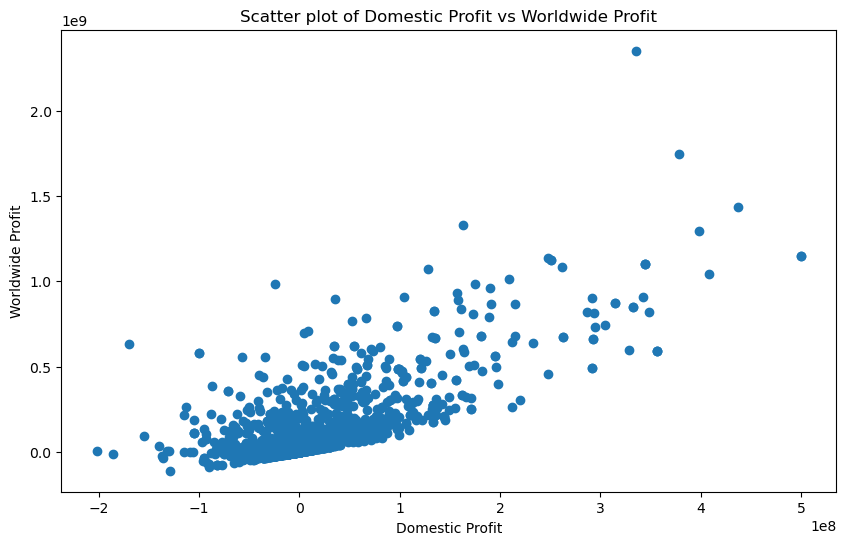

In [32]:
# plot a scatter plot to visualize the relationship between domestic profit and worldwide profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['domestic_profit'], merged_df1_df3['worldwide_profit'])
plt.xlabel('Domestic Profit')
plt.ylabel('Worldwide Profit')
plt.title('Scatter plot of Domestic Profit vs Worldwide Profit')
plt.show()

This scatter plot shows the correlation bettwen two domestic and worldwide profits
There’s a **strong positive correlation** between **Domestic Profit** and **Worldwide Profit** — movies that earn more domestically usually also earn more worldwide. A few outliers show that some films with weak domestic profits can still succeed globally.


## Scatter plot of production budget vs worldwide profit

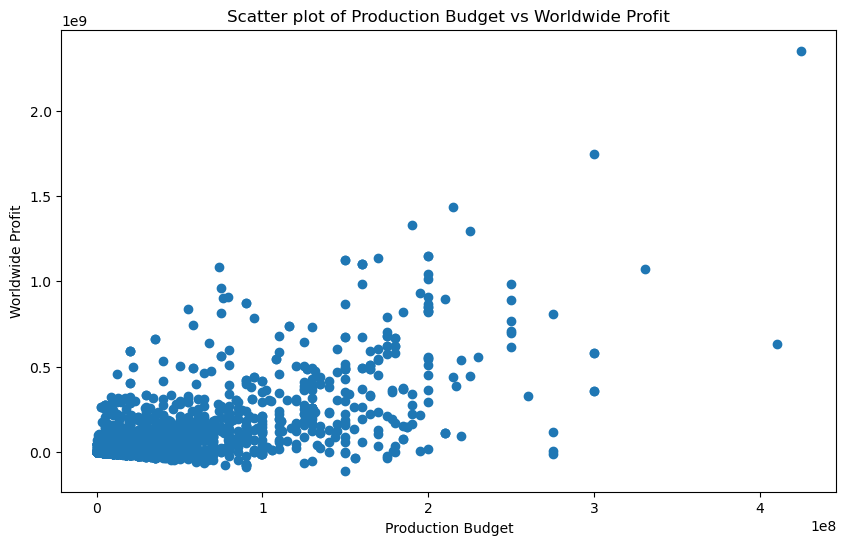

In [33]:
# scatter plot of production budget vs worldwide profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['production_budget'], merged_df1_df3['worldwide_profit'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Profit')
plt.title('Scatter plot of Production Budget vs Worldwide Profit')
plt.show()

 Based on the plot shown above , it shows that whenever the production budget increases there is also an increase in profits world wide.Successful films usually have moderate to high production budgets that translate into high worldwide profits. However, spending a lot doesn’t guarantee success—efficient use of the budget and global appeal are key to making strong profits.

## Scatter plot of domestic gross vs domestic profit

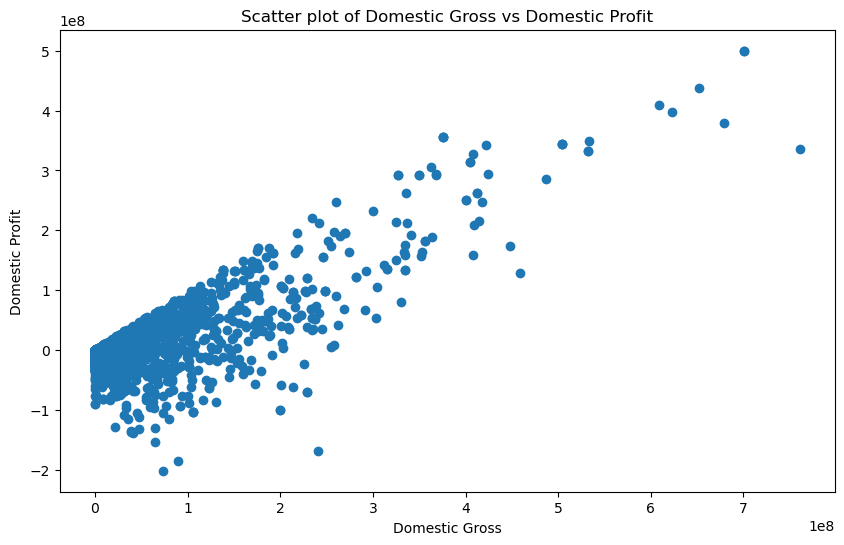

In [34]:
# scatter plot of domestic gross vs domestic profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['domestic_gross'], merged_df1_df3['domestic_profit'])
plt.xlabel('Domestic Gross')
plt.ylabel('Domestic Profit')
plt.title('Scatter plot of Domestic Gross vs Domestic Profit')
plt.show()

There is a clear positive correlation: as Domestic Gross increases, Domestic Profit generally increases as well. Most data points cluster along a diagonal trend, indicating that higher gross revenue often leads to higher profit. However, some points below the zero-profit line suggest that certain movies with high gross revenue may still experience losses. Overall, the plot confirms that Domestic Gross is a strong predictor of Domestic Profit in the movie industry

## Average domestic gross by year range

C:\Users\FELIX\AppData\Local\Temp\ipykernel_9844\1150159285.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_domestic_gross = merged_df1_df3.groupby('year_range')['domestic_gross'].mean().reset_index()
c:\Users\FELIX\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


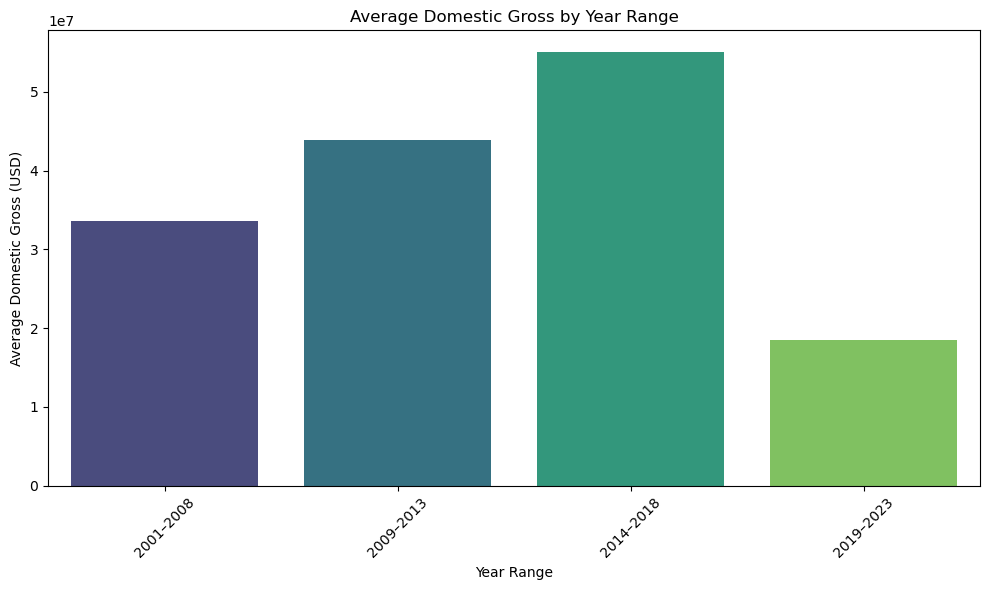

In [35]:
# Define the year ranges (bins)
bins = [2000, 2008, 2013, 2018, 2023]  # adjust as needed
labels = ['2001–2008', '2009–2013', '2014–2018', '2019–2023']

# Create a new column that categorizes each movie into a year range
merged_df1_df3['year_range'] = pd.cut(merged_df1_df3['year'], bins=bins, labels=labels, right=True)

# Group by year_range and calculate the average domestic gross
avg_domestic_gross = merged_df1_df3.groupby('year_range')['domestic_gross'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='year_range', y='domestic_gross', data=avg_domestic_gross, palette='viridis')

plt.title('Average Domestic Gross by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Average Domestic Gross (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The box office rose steadily from 2001 to a peak in 2014–2018, then dropped sharply in 2019–2023

## Average domestic gross by year range

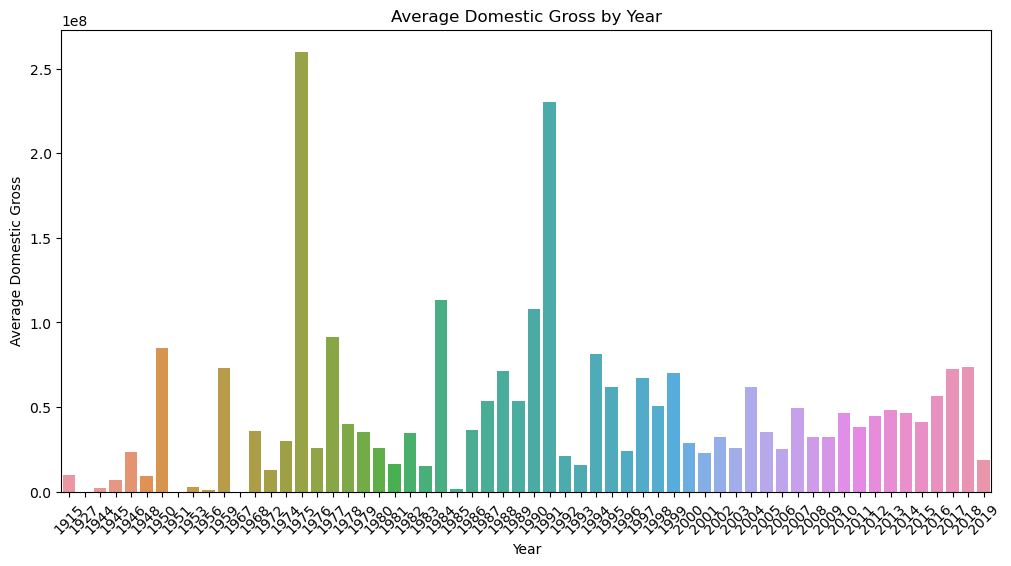

In [36]:
# average domestic gross by year range
merged_df1_df3['release_date'] = pd.to_datetime(merged_df1_df3['release_date'], errors='coerce')
merged_df1_df3['year'] = merged_df1_df3['release_date'].dt.year
yearly_domestic_gross = merged_df1_df3.groupby('year')['domestic_gross'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_domestic_gross, x='year', y='domestic_gross')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.title('Average Domestic Gross by Year')
plt.xticks(rotation=45)
plt.show()

Domestic grosses are low and erratic in the 1970s-1980s, increase, then levels off in the 1990s-2000s, and approach more typically high amounts in the 2010s, fluctuating due to the presence of blockbuster years.

## Top 15 movies by worldwide profit

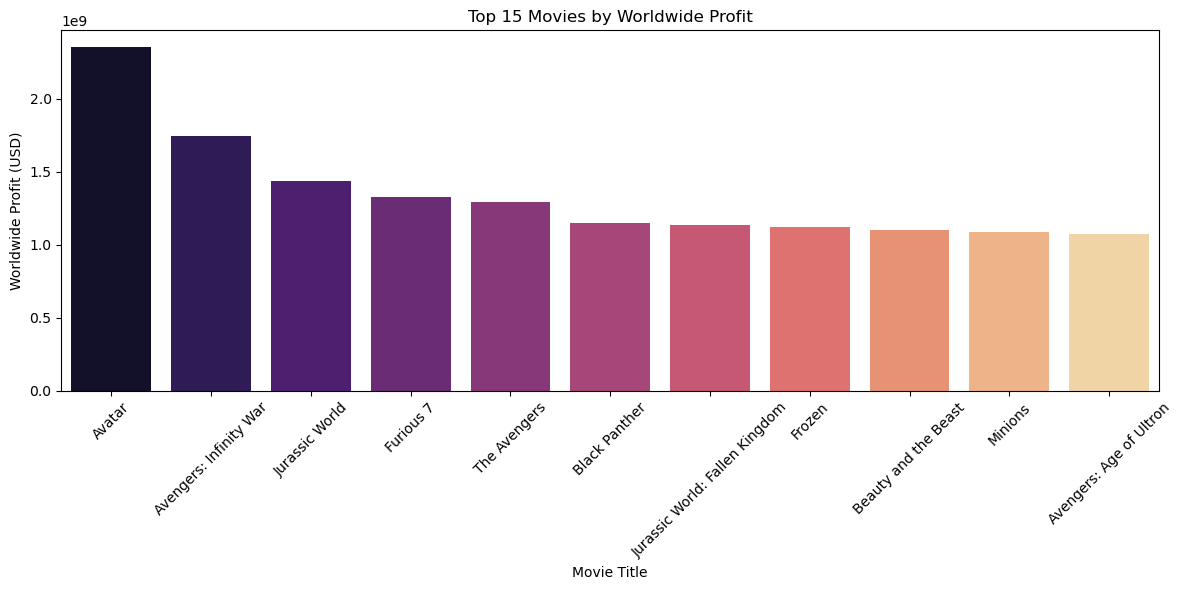

In [37]:
# top 15 movies by worldwide profit
top_15_worldwide_profit = merged_df1_df3.nlargest(15, 'worldwide_profit')[['title', 'worldwide_profit']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_worldwide_profit, x='title', y='worldwide_profit', palette='magma')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Profit (USD)')
plt.title('Top 15 Movies by Worldwide Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart represents the 10 most profitable movies in the world with the first place being Avatar and Titanic. Each of the mentioned movies earned more than 1 billion in revenue, an aspect that underscores the extent to which a small number of blockbusters command the biggest profits.

## Top 15 movies by domestic profit

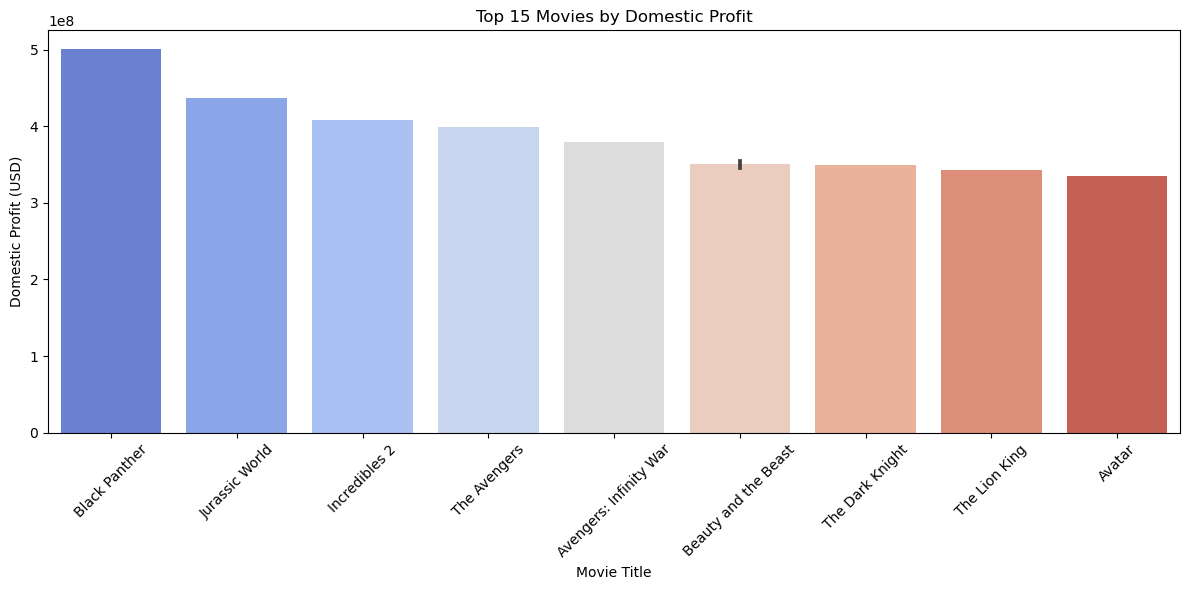

In [38]:
# top 15 movies by domestic profit
top_15_domestic_profit = merged_df1_df3.nlargest(15, 'domestic_profit')[['title', 'domestic_profit']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_domestic_profit, x='title', y='domestic_profit', palette='coolwarm')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Profit (USD)')
plt.title('Top 15 Movies by Domestic Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The table shows the highest-grossing films in the domestic profit of the U.S., with Black Panther taking the first position by a long margin over the others. The next in line are Jurassic world, Incredibles 2, the avengers and avengers infinite war all with hugely high returns on profits. The other movies like Beauty and the Beast, The Dark Knight, The Lion King and Avatar are also performing well with a profit of around 330M-360M.  
In general, the list is dominated by big franchises, superhero movies, and blockbuster remakes as they seem to be the preference of the audience that prefers big and high-budget films.

## Histogram of movie production budgets

c:\Users\FELIX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


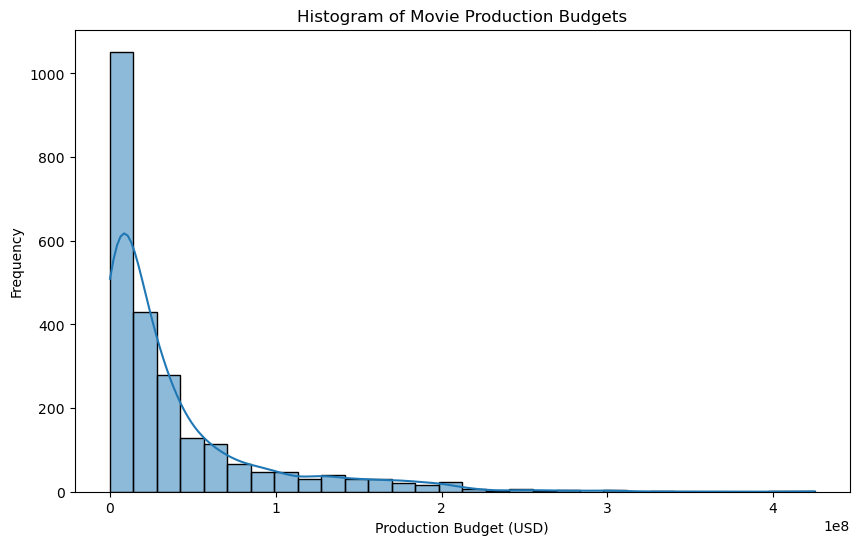

In [44]:
# create a histogram of production budgets
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1_df3['production_budget'], bins=30, kde=True)
plt.title('Histogram of Movie Production Budgets')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Frequency')
plt.show()

The figure demonstrates the distribution of worldwide movie revenues. The majority of films have very minimal earnings (below 100M), and it is the reason why the bars on the left side are very tall. The movies that make very high amounts are very few and there is a long tail to the right. This implies that the data is very skewed to the right: there are numerous low-earning films and very limited blockbusters.

In [45]:
# define df4
df4 = pd.read_csv('Data/rt_movie_info_cleaned.csv')
df4.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,14141054.5,104.0,Unknown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,14141054.5,116.0,Unknown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,14141054.5,128.0,Unknown
4,7,No synopsis available.,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1997-01-01,2004-06-01,$,14141054.5,200.0,Unknown


## Top 10 genres by average box office revenue

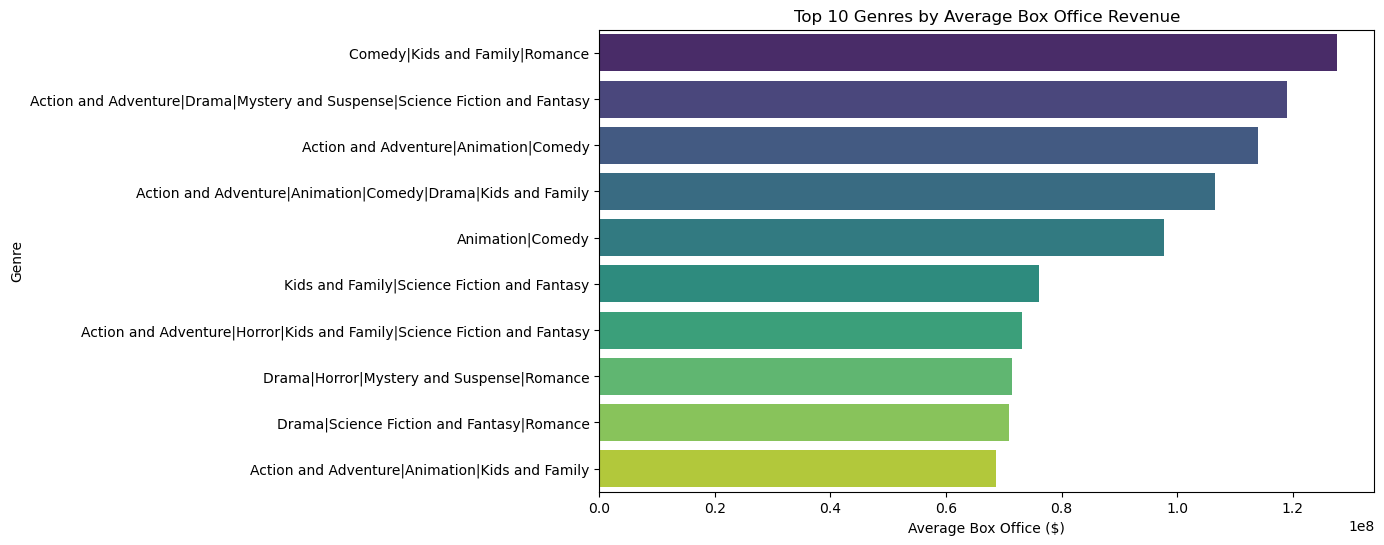

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Top performing genres
genre_box = df4.groupby('genre')['box_office'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_box.values, y=genre_box.index, palette='viridis')
plt.title('Top 10 Genres by Average Box Office Revenue')
plt.xlabel('Average Box Office ($)')
plt.ylabel('Genre')
plt.show()

The list indicates the top 10 movie genre combinations that have the highest average box office revenue.
The most overall earning genres are Comedy, Kids and Family, and Romance genres.  
Movies that have Action and Adventure especially when they are combined with Animation, Comedy, also feature high rankings, and therefore, they have high chances of attracting the audience.  
Genres related to family and blockbuster-action genres are at the top of the list, whereas genre blends are more likely to become the most revenue-generating genres.  

## Box office revenue per runtime

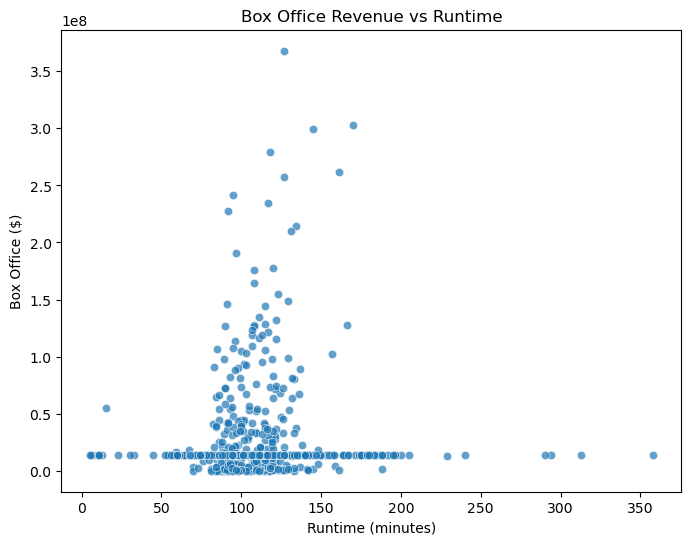

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='runtime', y='box_office', data=df4, alpha=0.7)
plt.title('Box Office Revenue vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office ($)')
plt.show()


The bulk of films are concentrated between 90-130 minutes and this is the range that harbours the best grossing movies too.  
No active or close relationship has been found between the longer the run time and the greater the revenue, since similarly long movies differ significantly on the viewer income.  
There are a number of outliers with large revenue in the range of 100-140 minutes, which suggests that the quality of the content is probably rather important than its length.  

## Top studios by average box office revenue

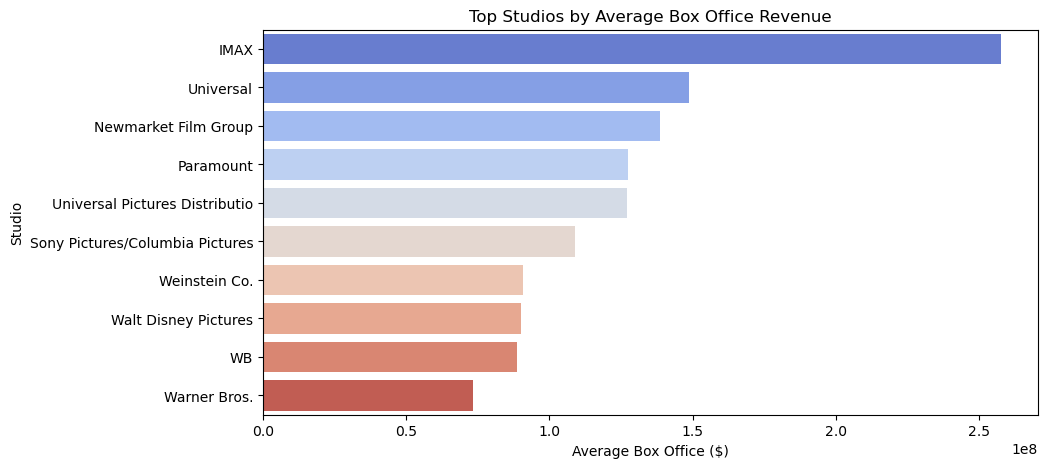

In [48]:
# Top Studios by Average Box Office
top_studios = df4.groupby('studio')['box_office'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_studios.values, y=top_studios.index, palette='coolwarm')
plt.title('Top Studios by Average Box Office Revenue')
plt.xlabel('Average Box Office ($)')
plt.ylabel('Studio')
plt.show()


IMAX has the highest average box office revenue by far, outperforming all other studios. Universal, Newmarket Film Group, and Paramount follow with strong but much lower averages. The rest Sony/Columbia, Weinstein Co., Disney, WB, and Warner Bros.—rank below these leaders but still remain among the top revenue-generating studios.

## Correlation Heatmap

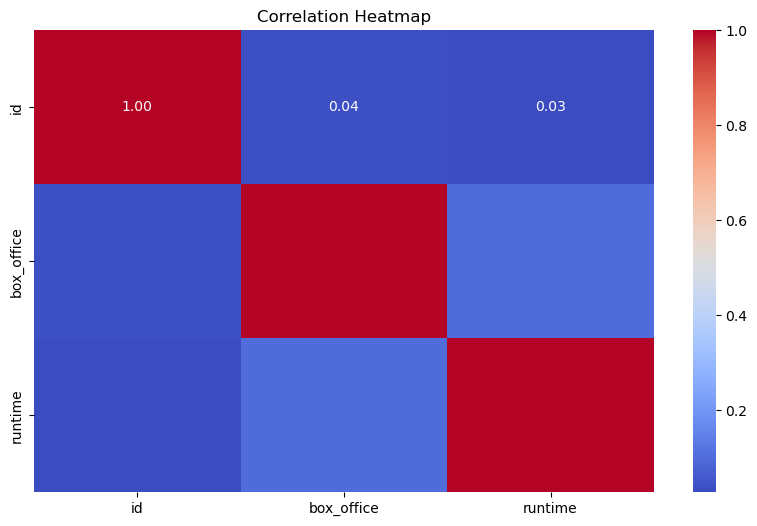

In [49]:
# Correlation Heatmap
# Identify which numeric variables are most related — e.g., does runtime or critic score correlate with box office?
plt.figure(figsize=(10,6))
corr = df4.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

There are no meaningful correlations among these variables.  
Most importantly: runtime does not appear to influence box-office performance in this dataset.

In [50]:
# Make sure theater_date is datetime
df4['theater_date'] = pd.to_datetime(df4['theater_date'], errors='coerce')

# Extract month and quarter for analysis
df4['release_month'] = df4['theater_date'].dt.month
df4['release_quarter'] = df4['theater_date'].dt.quarter
df4['release_year'] = df4['theater_date'].dt.year

## Average box office by release month

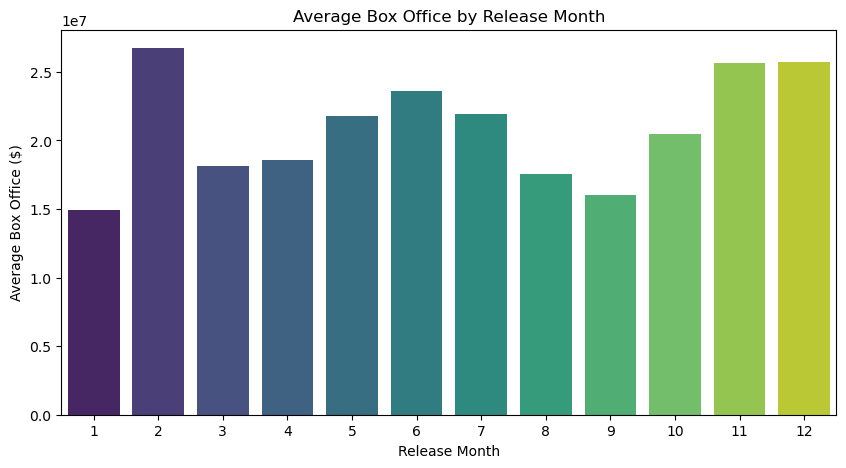

In [51]:
# Analyze which release periods perform best
# Box office by release month
monthly_box = df4.groupby('release_month')['box_office'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_box.index, y=monthly_box.values, palette='viridis')
plt.title('Average Box Office by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Box Office ($)')
plt.show()


The graph indicates the average box office is the highest in the months of February, November, and December. The lowest earning months are January, August and September. Summer (May-June) is also good and early fall is not strong.  

## Average box office by release year

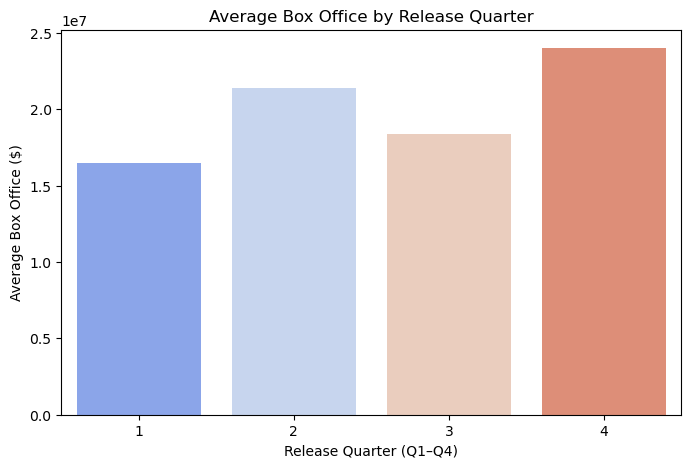

In [52]:
# Box office by release quarter
quarter_box = df4.groupby('release_quarter')['box_office'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=quarter_box.index, y=quarter_box.values, palette='coolwarm')
plt.title('Average Box Office by Release Quarter')
plt.xlabel('Release Quarter (Q1–Q4)')
plt.ylabel('Average Box Office ($)')
plt.show()

Movies released in Q4 earn the most, followed by Q2, then Q3, and Q1 earns the least. Overall, later-year releases perform better at the box office. 

## Top 10 studios by average box office perfomance


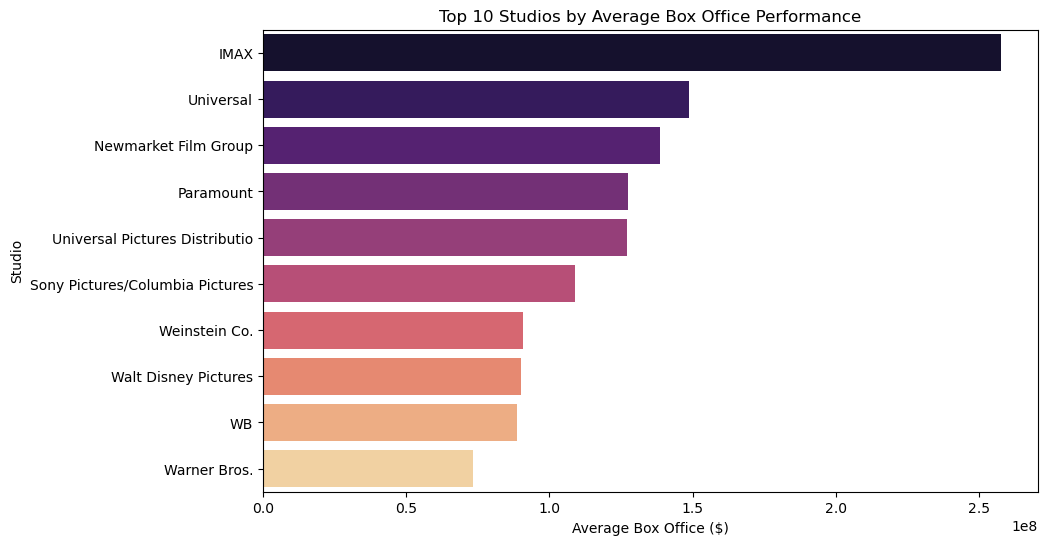

In [53]:
# Distribution channel (studio) analysis
# Top studios by average box office
top_studios = df4.groupby('studio')['box_office'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_studios.index, x=top_studios.values, palette='magma')
plt.title('Top 10 Studios by Average Box Office Performance')
plt.xlabel('Average Box Office ($)')
plt.ylabel('Studio')
plt.show()

IMAX has the highest average box office revenue by far, outperforming all other studios. Universal, Newmarket Film Group, and Paramount follow with strong but much lower averages. The rest Sony/Columbia, Weinstein Co., Disney, WB, and Warner Bros.—rank below these leaders but still remain among the top revenue-generating studios.

## Average Box Office by Release Quarter and Top studios

C:\Users\FELIX\AppData\Local\Temp\ipykernel_9844\1218217199.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='release_quarter', y='box_office', hue='studio', data=subset, ci=None)


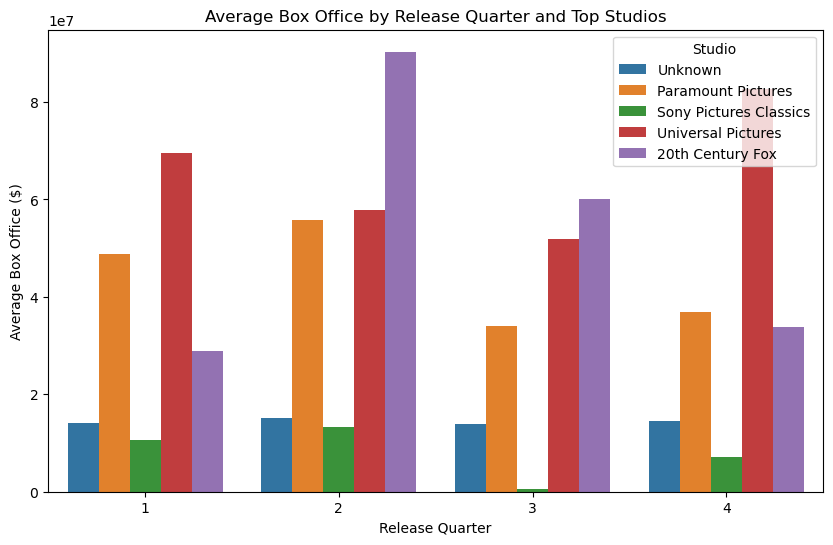

In [54]:
# Combine both insights
# You could combine release season + studio performance to see who wins when:
# Example: Average box office by quarter and studio (top 5 studios)
top5 = df4['studio'].value_counts().head(5).index
subset = df4[df4['studio'].isin(top5)]

plt.figure(figsize=(10,6))
sns.barplot(x='release_quarter', y='box_office', hue='studio', data=subset, ci=None)
plt.title('Average Box Office by Release Quarter and Top Studios')
plt.xlabel('Release Quarter')
plt.ylabel('Average Box Office ($)')
plt.legend(title='Studio')
plt.show()

The distance between 20 th Century Fox and Universal Pictures is evident, with the former performing better in Q2, and the latter in Q1 and Q4. Paramount does well in the first quarter of the year and lowers in the third quarter. The lowest income is received during each quarter by Sony Pictures Classics and the Unknown category. All in all, Q2 is the best in terms of averages, and Q3 the weakest of most studios.